# Import Libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

# Load Data

### Import Load Data Functions

In [2]:
from LoadData import *

### Load Data and Preprocess

In [3]:
# load images
# train_images_a, train_labels_a = load_data('training-a', 'training-a.csv')
# train_images_a, train_labels_a = preprocess_data(train_images_a, train_labels_a)

# train_images_b, train_labels_b = load_data('training-b', 'training-b.csv')
# train_images_b, train_labels_b = preprocess_data(train_images_b, train_labels_b)

# train_images_c, train_labels_c = load_data('training-c', 'training-c.csv')
# train_images_c, train_labels_c = preprocess_data(train_images_c, train_labels_c)

# train_images = np.concatenate((train_images_a, train_images_b, train_images_c), axis=0)
# train_labels = np.concatenate((train_labels_a, train_labels_b, train_labels_c), axis=0)

train_images, train_labels = load_data('training-a', 'training-a.csv')
train_images, train_labels = preprocess_data(train_images, train_labels)

# print shapes
print("train_images.shape = ", train_images.shape)
print("train_labels.shape = ", train_labels.shape)
print("train_images[0].shape = ", train_images[0].shape)

train_images.shape =  (1000, 28, 28, 1)
train_labels.shape =  (1000,)
train_images[0].shape =  (28, 28, 1)


### Split data into train and validation

In [4]:
# suffle data
s = np.arange(train_images.shape[0])
np.random.shuffle(s)
train_images = train_images[s]
train_labels = train_labels[s]

# split data into train and validation
train_ratio = 0.8
X_train = train_images[:int(train_ratio*len(train_images))]
y_train = train_labels[:int(train_ratio*len(train_labels))]
X_val = train_images[int(train_ratio*len(train_images)):]
y_val = train_labels[int(train_ratio*len(train_labels)):]

# Model

### Import Layers

In [5]:
from ConvolutionLayer import ConvolutionLayer
from ReLULayer import ReLULayer
from MaxPoolingLayer import MaxPoolingLayer
from FlattenLayer import FlattenLayer
from FullyConnectedLayer import FullyConnectedLayer
from SoftmaxLayer import SoftmaxLayer

### Import Model Class

In [6]:
from Model import Model

### Model Building

In [7]:
# use lenet-5 model
model = Model(10)
model.add(ConvolutionLayer(6, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(ConvolutionLayer(16, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(FlattenLayer())
model.add(FullyConnectedLayer(output_size=120))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=84))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=10))
model.add(SoftmaxLayer())

### Train Model

epoch:  0
y_pred (first 10)	:  [8 8 5 7 6 3 6 4 1 3]
y_real (first 10)	:  [6 8 5 7 7 6 2 6 9 7]
Training loss:  3.00625
Training accuracy:  0.24
Training f1 score:  0.21639677838762156

y_pred (first 10)	:  [3 8 1 3 5 7 8 9 9 5]
y_real (first 10)	:  [5 2 0 6 4 1 8 1 0 4]
Validation loss:  3.63
Validation accuracy:  0.27
Validation f1 score:  0.2614805097276446


epoch:  1
y_pred (first 10)	:  [6 9 5 7 7 2 2 5 1 3]
y_real (first 10)	:  [6 8 5 7 7 6 2 6 9 7]
Training loss:  2.61375
Training accuracy:  0.33125
Training f1 score:  0.3106724436609699

y_pred (first 10)	:  [5 8 1 3 5 2 8 9 9 5]
y_real (first 10)	:  [5 2 0 6 4 1 8 1 0 4]
Validation loss:  3.14
Validation accuracy:  0.335
Validation f1 score:  0.3306717481215863


epoch:  2
y_pred (first 10)	:  [6 8 5 7 7 6 3 5 1 7]
y_real (first 10)	:  [6 8 5 7 7 6 2 6 9 7]
Training loss:  1.87
Training accuracy:  0.415
Training f1 score:  0.35692119508571774

y_pred (first 10)	:  [5 8 1 5 5 8 8 2 3 5]
y_real (first 10)	:  [5 2 0 6 4 1 8 1 0 

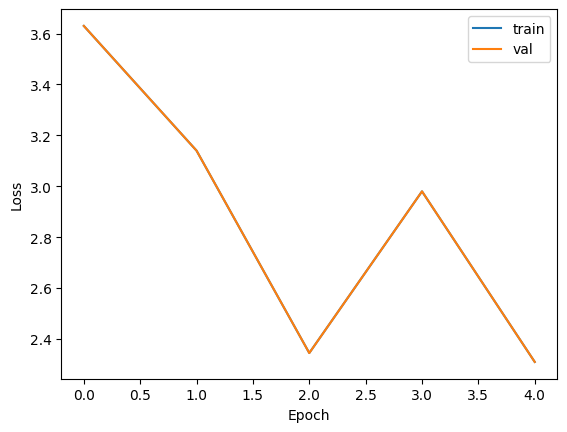

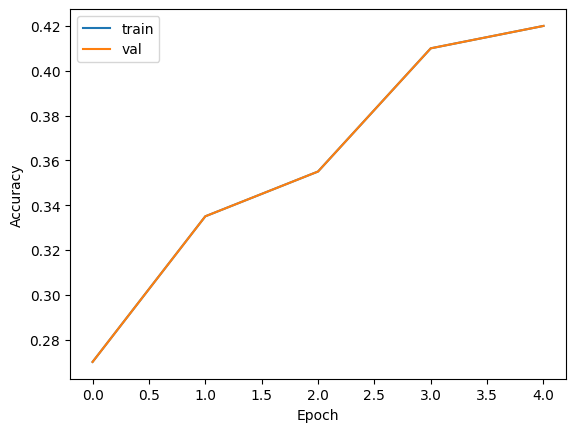

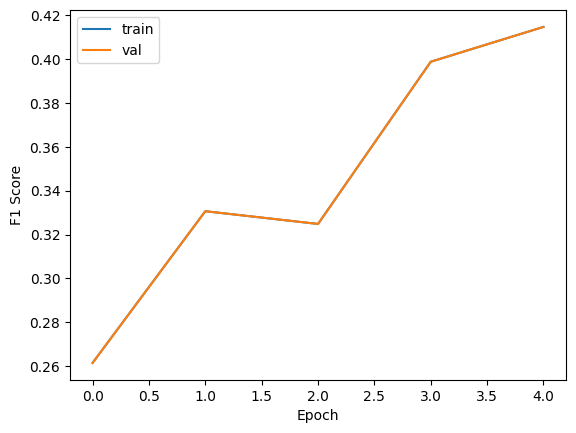

In [8]:
# train
model.train(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, learning_rate=0.00001, epochs=5, batch_size=64)

### Save Model

In [9]:
# Save the model using pickle
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model using pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


## Performace Metrics and Confusion Matrix

### Load Test Data

In [10]:
# load test images
test_images, test_labels = load_data('training-d', 'training-d.csv')
test_images, test_labels = preprocess_data(test_images, test_labels)

### Performance Matrics

In [11]:
# performance metrics and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict   
y_pred = model.predict(test_images)

# print performance metrics
print("Accuracy: ", accuracy_score(test_labels, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_labels, y_pred))

# print classification report
print("Classification Report: ", classification_report(test_labels, y_pred))

Accuracy:  0.169
Confusion Matrix:  [[ 3 37  1 10  4  6  1  3  1 35]
 [ 3 30  4  9  1  5  7  3  0 38]
 [ 0 30  8  9  0  9  4  1  0 38]
 [ 0  0 12 59  0  7  9  1  1 15]
 [ 4  5  4 26  1 16 19  8  1 13]
 [ 0 11 10 27  0  8 22  9  1 17]
 [ 3 14 10 11  1  7 13  4  0 24]
 [ 1  8 12 19  2  7 10 13  1 26]
 [ 5 12 13 20  6 10  4  7 11 12]
 [ 3 22 12 19  2  4 13  9  1 23]]
Classification Report:                precision    recall  f1-score   support

           0       0.14      0.03      0.05       101
           1       0.18      0.30      0.22       100
           2       0.09      0.08      0.09        99
           3       0.28      0.57      0.38       104
           4       0.06      0.01      0.02        97
           5       0.10      0.08      0.09       105
           6       0.13      0.15      0.14        87
           7       0.22      0.13      0.17        99
           8       0.65      0.11      0.19       100
           9       0.10      0.21      0.13       108

    accuracy 

### Confustion Matrix

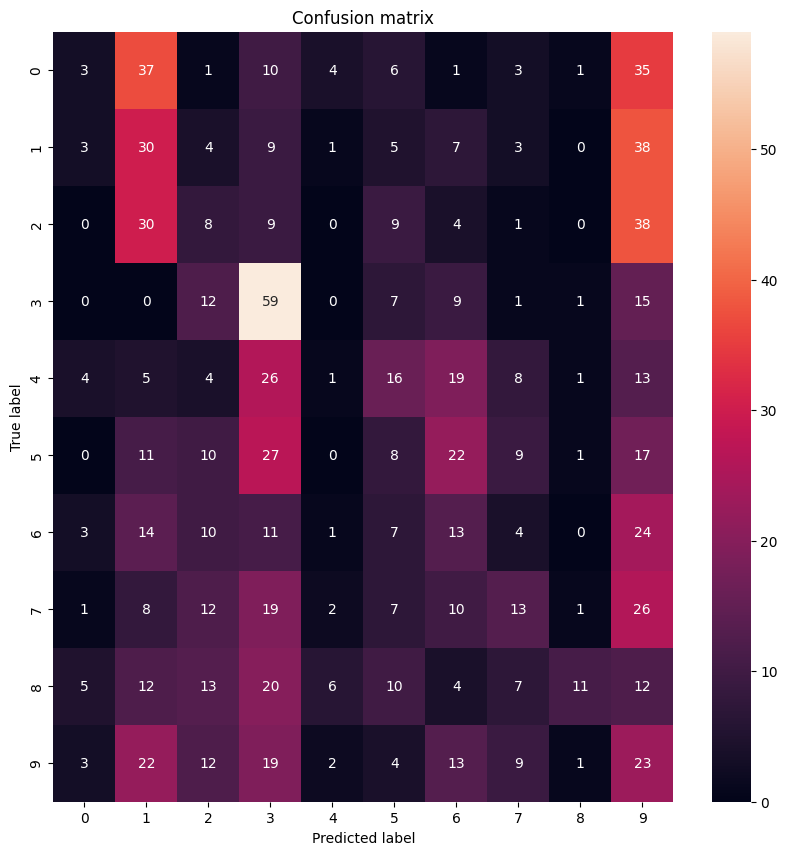

In [12]:
# plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()